In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 

#r2_score is finding goodness of fit ,higher values(r2_score)=>better the fit
#mean_absolute_error=>absolute means non-negative eg -5 is also 5 ,it measure the magnitude of the error without considering its direction.
#MSE penalizes larger errors more than smaller errors because of the squaring operation.(MEANS WHOLE SQUARE)^2
#RMSE is in the same unit as the target variable, making it more interpretable DUE TO SQUARE ROOT
#MAE,MSE AND RMSE All should be LOWER VALUE,LOWER THE VALUE ,BETTER THE MODEL IT INDICATES

#import rsme at the end

import os

import warnings
warnings.filterwarnings('ignore')


In [36]:
df=pd.read_csv(r'D:\Project_1_krish_naik\stud.csv')

In [37]:
os.getcwd() #to get current working directory

'd:\\Project_1_krish_naik\\notebook'

In [38]:
#os.chdir(r'd:\\Project_1_krish_naik') #To change current working directory

In [39]:
os.getcwd()

'd:\\Project_1_krish_naik\\notebook'

In [40]:
df.sample(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
861,female,group E,master's degree,free/reduced,none,81,86,87
494,female,group B,high school,standard,none,54,64,68


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


* #### Preparing Independent and Target Variables

##### Independent Variable

In [42]:
df1=df.copy()

In [43]:
df1.sample()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
228,male,group A,some high school,free/reduced,none,68,72,64


In [44]:
#Preparing Independent Variable
df1.drop(columns='math_score',axis=1,inplace=True) #axis=1 means columns ,axis =0 means row or index
#mention inplace=True ,Defaulty inplace will be false

In [45]:
#Independent Variable
X=df1
X.sample()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
393,male,group C,associate's degree,standard,completed,54,56


In [46]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   reading_score                1000 non-null   int64 
 6   writing_score                1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB
None


##### Target Variable

In [47]:
df2=df.copy()

In [48]:
#To drop all columns in a DataFrame except one column using the drop method in pandas
#IMPORTANT

target_col='math_score' # Specify the column you want to keep
df2=df2.drop(columns=df2.columns.difference([target_col])) # Drop all columns except the specified one

In [49]:

Y=df2
Y.sample()

,math_score
167,58


In [50]:
print(Y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   math_score  1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB
None


In [51]:
for columns in df1.columns:
    how_many_cat=df1[columns].unique()
    n_categories=df1[columns].nunique()
    print(f"column_name:\n{columns}:{how_many_cat}  No:{n_categories}")
    

column_name:
gender:['female' 'male']  No:2
column_name:
race_ethnicity:['group B' 'group C' 'group A' 'group D' 'group E']  No:5
column_name:
parental_level_of_education:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']  No:6
column_name:
lunch:['standard' 'free/reduced']  No:2
column_name:
test_preparation_course:['none' 'completed']  No:2
column_name:
reading_score:[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]  No:72
column_name:
writing_score:[ 74  88  93  44  75  78  92  39  67  50  52  43  73  70  58  86  28  46
  61  63  53  80  72  55  65  38  82  79  83  59  57  54  68  66  62  76
  48  42  87  49  10  34  71  37  56  41  22  81  45  36  89  47  90 100
  64  98  51  40  84  6

In [52]:
# #Splitting into categorical and numerical features
# cat_features=[]
# for column in df1.columns:
#     if df1[column].dtype == 'O':
#         print("categorical:",column)


In [53]:
# num_features=X.select_dtypes(exclude='object').columns
# cat_featues=X.select_dtypes(include='object').columns

In [54]:
# num_features = X.select_dtypes(exclude="object").columns
# cat_features = X.select_dtypes(include="object").columns
# print(num_features)
# for col in num_features:
#     print(col)


In [55]:
#Achieve the above cell code same using loop
num_feature=[]
cat_feature=[]
for column in df1.columns:
    if df1[column].dtype != 'O':
        num_feature.append(column)
    elif df1[column].dtype == 'O':
        cat_feature.append(column)
        

In [56]:
print(num_feature)
print(cat_feature)

['reading_score', 'writing_score']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


* #### Difference between 
* num_features = X.select_dtypes(exclude="object").columns
* cat_features = X.select_dtypes(include="object").columns

#### (vs)

* num_feature=[]
* cat_feature=[]
* for column in df1.columns:
    if df1[column].dtype != 'O':
        num_feature.append(column)
    elif df1[column].dtype == 'O':
        cat_feature.append(column)


The two approaches you provided achieve the same goal of separating numerical and categorical features in a DataFrame, but they use different methods to do so.

Using select_dtypes method:
num_features = X.select_dtypes(exclude="object").columns selects columns of numeric data type (exclude="object").
cat_features = X.select_dtypes(include="object").columns selects columns of object data type (include="object").
This method utilizes the select_dtypes method provided by pandas to directly filter columns based on their data types.


Looping through DataFrame columns:
num_feature and cat_feature are initialized as empty lists.

The loop iterates through each column in the DataFrame (for column in df1.columns).
For each column, it checks its data type (df1[column].dtype) and appends the column name to either num_feature or cat_feature based on whether it's numeric or categorical.
This method manually inspects each column's data type and categorizes them accordingly.
Differences:

* The first method is more concise and relies on built-in pandas functionality (select_dtypes) to directly filter columns based on their data types.


The second method provides more control and flexibility, allowing for custom logic to be applied when categorizing columns. It can be useful if you need to apply more complex rules or if you're working in an environment where direct pandas methods might not be available or suitable.


In summary, both methods achieve the same result, but they offer different levels of simplicity and flexibility in how you separate numerical and categorical features in a DataFrame.







In [57]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer


In [58]:
numeric_transformer =StandardScaler()
OneHot_Transformer= OneHotEncoder()

Preprocessor= ColumnTransformer(
    [
        ('OneHotEncoder',OneHot_Transformer,cat_feature),
        ('StandardScaler',numeric_transformer,num_feature)
    ]
)

# ColumnTransformer Configuration: The ColumnTransformer is configured with a list of tuples, each specifying a transformation to be applied to a subset of columns in the input data.
# Each tuple contains:

# A name for the transformation (e.g., 'OneHotEncoder', 'StandardScaler').

# The transformer instance to apply.

# The list of column names to which the transformation should be applied.


In [59]:
X= Preprocessor.fit_transform(X) #this code will apply one-hot encoding to the columns specified in cat_feature using OneHotEncoder, and it will scale the columns specified in num_feature using StandardScaler at the same time 

In [60]:
X.shape

(1000, 19)

* ### num_feature and cat_feature has only Names How it works?
So, even though num_feature and cat_feature only store column names, the ColumnTransformer uses this information to apply the appropriate transformations to the corresponding columns of the input data, resulting in the transformed data with the correct shape.
How this happens?

The ColumnTransformer uses the column names provided in num_feature and cat_feature to identify which columns in the input data correspond to numerical and categorical features, respectively.

Here's how the process works step by step:

Initialization:
You define two transformers: numeric_transformer and OneHot_Transformer.
Configuration:
You create a ColumnTransformer named Preprocessor, specifying two transformations:
'OneHotEncoder': It will be applied to columns specified in cat_feature.
'StandardScaler': It will be applied to columns specified in num_feature.
Fit and Transform:
When you call Preprocessor.fit_transform(X), ColumnTransformer:
* """Automatically identifies the columns in 'X' that correspond to the column names specified in num_feature and cat_feature."""


Applies the appropriate transformation to each subset of columns.
Concatenates the transformed data to produce the final transformed array X_transformed.
* """The key here is that ColumnTransformer internally maps the column names provided in num_feature and cat_feature to the columns in the input data X."""


 This mapping allows it to apply the specified transformations to the correct subsets of columns, resulting in the transformed data with the correct shape.

So, even though num_feature and cat_feature store only column names, they serve as instructions for ColumnTransformer to properly preprocess the data based on the types of features specified.

In [61]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


In [62]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(800, 19) (800, 1)
(200, 19) (200, 1)


* ##### Create an Evaluation Function to give all metrics after model training

In [63]:
def evaluate_model(true,predicted):
    mae =mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r_square= r2_score(true,predicted)
    
    return mae,mse,rmse,r_square

In [64]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [65]:
models={
    "linear_Regression":LinearRegression(),
    "Rigde":Ridge(),
    "Lasso":Lasso(),
    "support_vector_machine":SVR(),
    "Kneighbours_Regressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "catboost":CatBoostRegressor(verbose=False),#why we are using verbose=False because catboostregressor will show training log messages.So to supress the output where it piles lot of logs we set verbose to false
    "xgboost":XGBRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i] #Note this line if we put like model=list(models.values()[i]) it will throws TypeError: 'dict_values' object is not subscriptable
    model.fit(x_train,y_train) #Train the Model
    
    #Make Predictions:
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    #Evaluate Train and test dataset
    train_mae,train_mse,train_rmse,train_r2_score =evaluate_model(y_train,y_train_pred)
    test_mae,test_mse,test_rmse,test_r2_score = evaluate_model(y_test,y_test_pred)
    
    keys =list(models.keys())[i]#Note this line if we put like model=list(models.keys()[i]) it will throws TypeError: 'dict_keys' object is not subscriptable
    print("Model_Name:",keys)
    model_list.append(keys)
    
    print("Model performance of TRAINING set")
    
    #print(f"mae:{train_mae}\n mse:{train_mse}\n rmse:{train_rmse}\n \n r2_score:{train_r2_score}\n ")
    #print("mae:{:.3f}\n mse:{:.4f}\n rmse:{:.4f}\n \n r2_score:{:.4f}\n".format(train_mae,train_mse,train_rmse,train_r2_score))
    
    print(f"mae: {train_mae:.4f}\n mse: {train_mse:.4f}\n rmse: {train_rmse:.4f}\n \n r2_score: {train_r2_score*100:.2f}\n") #here *100 is used to display r2_score as 85 instead of 0.85 
    #refer below what is :.4f=>PRECISION POINTER
    
    print("="*25) #is using the '*' operator to create a string consisting of 35 equals signs (=) concatenated together. 
    #This is a shorthand way to create a string containing a repeated character multiple times.
    
    print("Model performance of TESTING set")
    
    #print(f"mae:{test_mae}\n mse:{test_mse}\n rmse:{test_rmse}\n \n r2_score:{test_r2_score}\n ")
    #print("mae:{:.4f}\n mse:{:.4f}\n rmse:{:.4f}\n \n r2_score:{:.2f}\n".format(test_mae,test_mse,test_rmse,test_r2_score))
    
    print(f"mae: {test_mae:.4f}\n mse: {test_mse:.4f}\n rmse: {test_rmse:.4f}\n \n r2_score: {test_r2_score*100:.2f}\n")
    
    r2_list.append(test_r2_score)
    
    print("="*100)

# IMPORTANT WHAT IS :.3f =>called as PRECISION SPECIFIER

#The part of a format specifier such as :.2f or :.3f that follows the colon (:)
# and precedes the f (which indicates that the value should be formatted as a floating-point number)
# is called the precision specifier.

# {train_mae:.3f} formats the value of train_mae to three decimal places.
# {train_mse:.4f} formats the value of train_mse to four decimal places.
# {train_rmse:.4f} formats the value of train_rmse to four decimal places.
# {train_r2_score:.4f} formats the value of train_r2_score to four decimal places.
# You can adjust the number after the colon (:) to specify the desired number of decimal places for each value.
    
    
    

Model_Name: linear_Regression
Model performance of TRAINING set
mae: 4.2671
 mse: 28.3485
 rmse: 5.3243
 
 r2_score: 87.43

Model performance of TESTING set
mae: 4.2158
 mse: 29.1167
 rmse: 5.3960
 
 r2_score: 88.03

Model_Name: Rigde
Model performance of TRAINING set
mae: 4.2650
 mse: 28.3378
 rmse: 5.3233
 
 r2_score: 87.43

Model performance of TESTING set
mae: 4.2111
 mse: 29.0563
 rmse: 5.3904
 
 r2_score: 88.06

Model_Name: Lasso
Model performance of TRAINING set
mae: 5.2063
 mse: 43.4784
 rmse: 6.5938
 
 r2_score: 80.71

Model performance of TESTING set
mae: 5.1579
 mse: 42.5064
 rmse: 6.5197
 
 r2_score: 82.53

Model_Name: support_vector_machine
Model performance of TRAINING set
mae: 4.8692
 mse: 43.2570
 rmse: 6.5770
 
 r2_score: 80.81

Model performance of TESTING set
mae: 5.4015
 mse: 66.0420
 rmse: 8.1266
 
 r2_score: 72.86

Model_Name: Kneighbours_Regressor
Model performance of TRAINING set
mae: 4.5167
 mse: 32.5776
 rmse: 5.7077
 
 r2_score: 85.55

Model performance of TE

In [66]:
for i in model_list:
    print(i)

linear_Regression
Rigde
Lasso
support_vector_machine
Kneighbours_Regressor
DecisionTreeRegressor
RandomForestRegressor
AdaBoostRegressor
catboost
xgboost


In [67]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model_Name','R2_score']).sort_values(by='R2_score',ascending=False)

,Model_Name,R2_score
1,Rigde,0.880593
0,linear_Regression,0.880345
6,RandomForestRegressor,0.851709
8,catboost,0.851632
7,AdaBoostRegressor,0.847971
9,xgboost,0.827797
2,Lasso,0.825320
4,Kneighbours_Regressor,0.783813
5,DecisionTreeRegressor,0.766190
3,support_vector_machine,0.728600


* Inside the pd.DataFrame() constructor, you typically provide the data that you want to convert into a DataFrame. There are several common ways to provide data to create a DataFrame:

From a Dictionary: You can pass a dictionary where keys are column names and values are the corresponding column data.
python
Copy code
* data = {'Column1': [1, 2, 3], 'Column2': ['A', 'B', 'C']}
* df = pd.DataFrame(data)

From a List of Lists: You can pass a list of lists where each inner list represents a row of data.
python
Copy code
* data = [[1, 'A'], [2, 'B'], [3, 'C']]
* df = pd.DataFrame(data, columns=['Column1', 'Column2'])

From a NumPy Array: You can pass a NumPy array containing your data.
python
Copy code
import numpy as np
* data = np.array([[1, 2], [3, 4], [5, 6]])
* df = pd.DataFrame(data, columns=['Column1', 'Column2'])

From a CSV or Other File: You can read data from a file using pd.read_csv() or other similar functions.
python
Copy code
* df = pd.read_csv('data.csv')

From a Series: You can pass one or more pandas Series objects.
python
Copy code
s1 = pd.Series([1, 2, 3])
s2 = pd.Series(['A', 'B', 'C'])
df = pd.DataFrame({'Column1': s1, 'Column2': s2})

These are some common ways to create a DataFrame using pd.DataFrame(), but there are also other methods depending on your specific use case.

* ##### Ridge is Giving better accuracy so go for ridge Model

In [68]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

model =Ridge()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print(f"Accuracy of the model is:{score:.3f}%")

Accuracy of the model is:88.059%


##### Plot Y_test and Y_pred

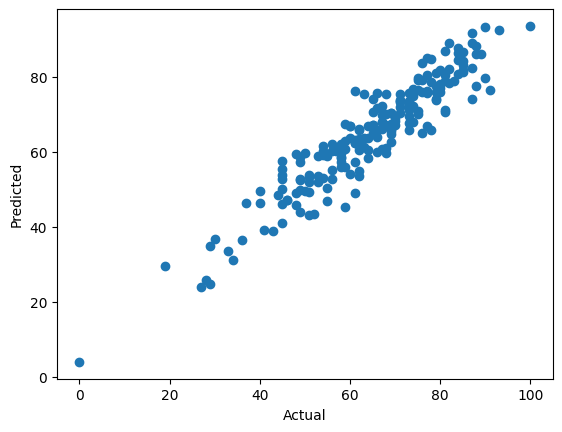

In [84]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

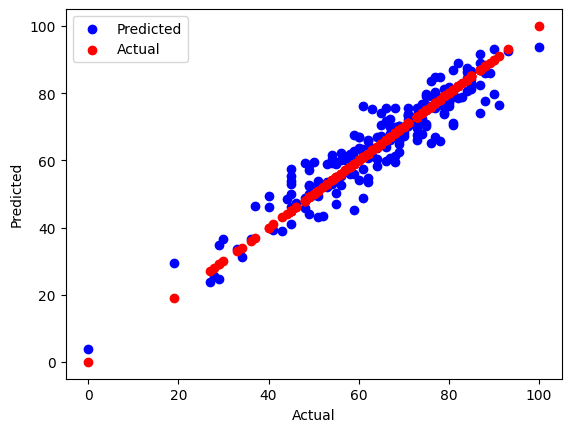

In [92]:
#Chatgpt
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are NumPy arrays or lists containing actual and predicted values

# Your existing scatter plot for predicted values
plt.scatter(y_test, y_pred, color='blue',label='Predicted')#label parameter is to show legend values  # Blue for predicted values 

# Scatter plot for actual values
plt.scatter(y_test, y_test, color='red', label='Actual')  # Red for actual values

# Customize labels and other plot properties
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()  # Show legend with labels for actual and predicted

plt.show()


#### Using Seaborn

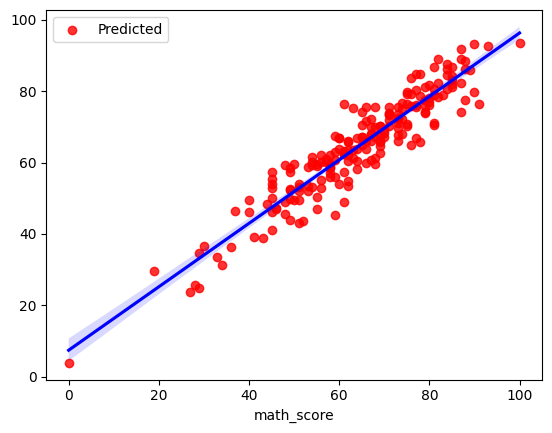

In [94]:
sns.regplot(x=y_test,y=y_pred,scatter_kws={'color':'red'},line_kws={"color":"blue"},label='Predicted',color='red')
plt.legend()

In [97]:
# pred_df=pd.DataFrame({"Actual_Values":y_test,"Predicted_Values":y_pred,"Difference":y_test-y_pred})
# pred_df

ValueError: Per-column arrays must each be 1-dimensional

The error you're encountering indicates that one or more of the arrays you're passing to pd.DataFrame() are not one-dimensional. When creating a DataFrame using a dictionary, each value should be a one-dimensional array, but it seems one of your arrays might be multidimensional.

To resolve this issue, ensure that y_test, y_pred, and y_test - y_pred are all one-dimensional arrays or lists before passing them to pd.DataFrame(). You can do this by flattening any multidimensional arrays or reshaping them if necessary.



In [99]:
y_test= np.array(y_test).flatten()
y_pred=np.array(y_pred).flatten()
difference=y_test-y_pred
prediction_df=pd.DataFrame(list(zip(y_test,y_pred,difference)),columns=['Actual Values',"Predicted values",'Difference'])
prediction_df

,Actual Values,Predicted values,Difference
0,91,76.398705,14.601295
1,53,58.842469,-5.842469
2,80,76.992129,3.007871
3,74,76.805898,-2.805898
4,84,87.615387,-3.615387
...,...,...,...
195,52,43.492293,8.507707
196,62,62.170763,-0.170763
197,74,67.910325,6.089675
198,65,67.061504,-2.061504


In [104]:
#Iterate through Dataframe and print all the values

for index,row in prediction_df.iterrows():
    print(f"{index} Actual value:{row['Actual Values']}\t Predicted_value:{row['Predicted values']}\t Difference:{row['Difference']}")

0 Actual value:91.0	 Predicted_value:76.39870549583675	 Difference:14.60129450416325
1 Actual value:53.0	 Predicted_value:58.84246852339133	 Difference:-5.842468523391332
2 Actual value:80.0	 Predicted_value:76.99212918627023	 Difference:3.0078708137297667
3 Actual value:74.0	 Predicted_value:76.80589763945441	 Difference:-2.8058976394544146
4 Actual value:84.0	 Predicted_value:87.61538748633225	 Difference:-3.615387486332253
5 Actual value:81.0	 Predicted_value:78.9154496813047	 Difference:2.0845503186953067
6 Actual value:69.0	 Predicted_value:64.71522731240744	 Difference:4.2847726875925645
7 Actual value:54.0	 Predicted_value:53.04476090506876	 Difference:0.9552390949312368
8 Actual value:87.0	 Predicted_value:74.11589981527612	 Difference:12.884100184723877
9 Actual value:51.0	 Predicted_value:49.36684719541292	 Difference:1.633152804587077
10 Actual value:45.0	 Predicted_value:52.86364945363178	 Difference:-7.86364945363178
11 Actual value:30.0	 Predicted_value:36.665863287186845